# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [3]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

1) Yes. The smartcab has 1 out of 4 actions/moves available.

    a) Do nothing
    
    b) Go forward
    
    c) Turn left
    
    d) Turn right
    
    During the simulation/training, the cab takes 1 one of these actions randomly.
    
2) Based on the action performed, the agent gets a feedback (reward) which helps the agent understand whether or not the action was appropriate or not, given the state. The feedback scheme is roughly the following:

    a) If the agent legally took the expected path or correctly stopped at a red light, there is a small positive reward.
    
    b) If the agent went the wrong way but still followed all the rules, it still gets a positive reward but much smaller.
    
    c) If the agent did something illegal, it gets a heavy negative reward (much heavier than the positive rewards) depending on the severity and result of action.
       e.g. a minor violation is stopping at a green light without oncoming traffic. A somewhat worse violation is running a red light. An even worse violation is turning left on a green light with oncoming traffic going forward or turning right (which would result in an accident). Finally, the worst reward is for the case when the agent is in an accident while running a red light. 

3) It is illegal to run a red light or to stop at a green light. The lights help determine the correct course of action for the agent and hence, help determine the reward received by the agent.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

**agent.py:**

1) learning: if the learning flag is false, the agent always performs a random action. If the flag is true, the agent keeps a record of actions and rewards and decides whether to explore new actions or to simply do what gives it the best reward based on past experience.

2) epsilon: In case the agent is learning, epsilon determines how often the agent tries to do something randomly (to explore) instead of using the past experience. If the value of epsilon is close to 1, the agent almost always takes a random action. This helps the agent learn the consequences of different actions in a given state but also reduces the probability the agent would succeed (since it never uses what it learned). 

3) alpha: In case the agent is training, alpha determines the rate of learning. If alpha is set to close to 0, the agent never learns the consequence of its actions. If the alpha is set close to 1, the agent understands the latest consequence to be the correct consequence of its action in a given state (i.e. it wipes out any previously learned consequence).

**environment.py**
act:

act function understands the action performed by the agent, updates the location of the agent in its worldview, determines the reward for the action and determines if the agent has reached its destination.

**simulator.py**

render_text shows the state, action and reward in the console. 

render shows the state of the world (including all other cabs) at each instance in pygame window.

**planner.py**
East-West.

This function determines the direction the cab needs to take for the next action to get closer to the destination. It will first try to get the cab at same longitude. If the cab is at the same longitude as the destination, it will then try to move north-south as required.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


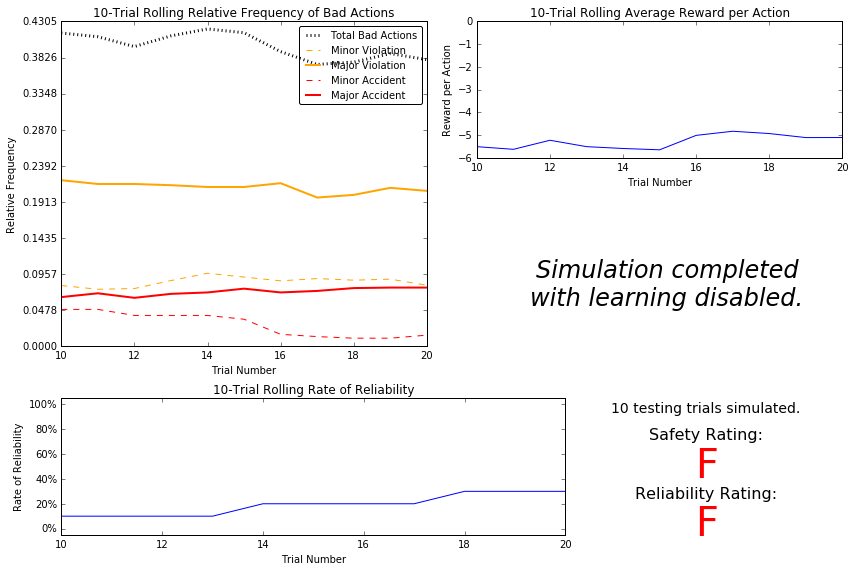

In [7]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
    
    1) On average, the cab is making bad actions roughly 0.4 times per trial. Around 0.3 times per trial, it results in an accident (major or minor). 
    
    2) Yes. If the start and destination are close to each other, there is a reasonable chance that the cab would be able to luck into destination but in a large majority of the cases (especially when start and destination are not close together), the cab wouldn't be able to find the destination.
    
    3) On average, the agent receives a negative reward. Given that a majority of its decisions are good, this suggests that the penalty for making a bad decision is very heavy.
    
    4) Not really. The relative frequency of bad actions does not show any signs of improvement with increase in the number of trial but the reliability rate seems to show improvement. This is not expected and is likely a chance improvement.
    
    5) No, this cab neither safe nor reliable. Safe cabs would have very low rate of major accidents. Reliable cabs should reach their destination within reasonable timeline most of the times. Some slippage in reliability is tolerable, however, a reliability rate of 20% wouldn't be considered reliable.
    
    

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

waypoint and inputs (sensor data) are most relevant for learning both safety and efficiency. 

waypoint is required for efficiency: without knowing the right direction to go, the agent can't expect to learn the appropriate action.

sensor data is relevant to ensure safety:

    'light' signal is required to understand whether to stop or go.
    
    'left' input is required to understand whether the cab legally turn right on a red light. It can't turn right on a red light if the traffic coming from left is going straight.
    
    'oncoming' input is required to understand whether the cab legally turn left on a green light. It can't turn left even on a green light if the oncoming traffic is going straight or turning right. 
    
    'right' input can be skipped. Without it, the agent wouldn't be able to determine whether running a red light would cause an accident or not but since the agent should be trained to not run the red light in the first place, the need for this input is small.
    
'deadline' is not required. The agent is rewarded better if takes the direction required than if it takes wrong direction, so it tries to follow the optimal path. Using this input is not expected to either improve safety or efficiency.
    

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The chosen features have the following number of available instances:

waypoint: 3 ('forward', 'left', 'right')

light: 2 ('red', 'green')

oncoming: 4 (None, 'forward', 'left', 'right')

left: 4 (None, 'forward', 'left', 'right')

Size of state space = 3x2x4x4 = 96

Given 4 possible actions for each state, there are 384 possible (state, action) pairs to learn. With 50 trials and max of say, around 100 actions in each trial, there are potentially 5000 actions available to learn from. However, in most steps both the state and action may be repeated.

The driving agent would almost certainly not learn the consequence of ALL possible actions for ALL possible states. However, it can likely learn 1 positive action (or avoid all bad actions) for each of the states (96). i.e. our cab may not always find the optimal route, but it will likely get to the destination eventually and (with high likelihood) without accident.

PS: As we see later, we ran 59 trials but with enforced deadline (i.e. maximum of 5x of actions required in best case) and for most states, we learned at least 1 positive action.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

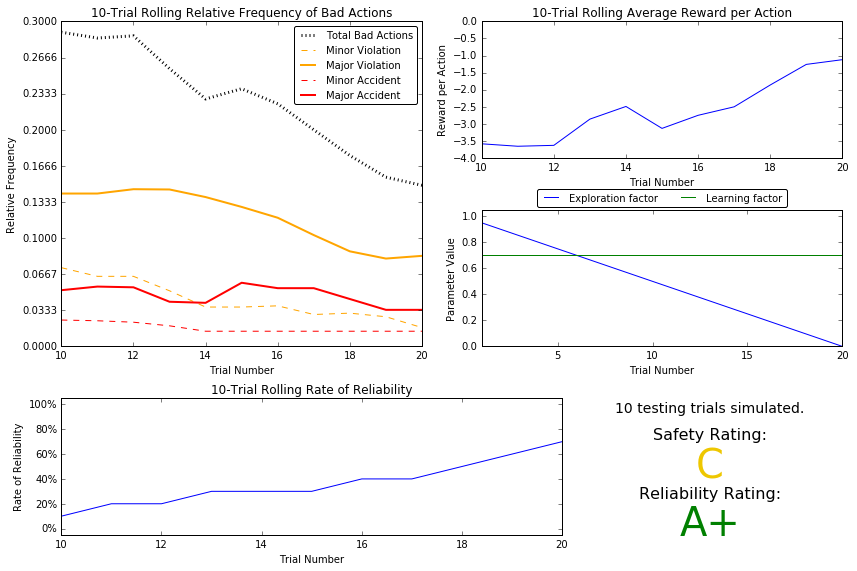

In [9]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

1) We still see that rolling average reward during training remains negative. This is due to the very heavy penalty of taking a bad decision. This is also reflected in the still bad Safety Rating.

2) 20. Due to linear decrease in epsilon, after 20 training trials, epsilon was 0, i.e. the agent was no longer learning. 

3) Yes. The exploration factor is seen to be linearly decreasing after starting at 1. After 20 trials, it is at 0.

4) Yes. In shown simulation, the 10-trial rolling relative frequency of bad actions went from 0.3 after 10 trials to 0.15 after 20. Since the frequencies are rolling, the actual frequencies decreased faster.

5) Much better. In testing trials, the cab always reached the destination in time. However, in 3 trials, it had a major violation (though no accidents). 


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

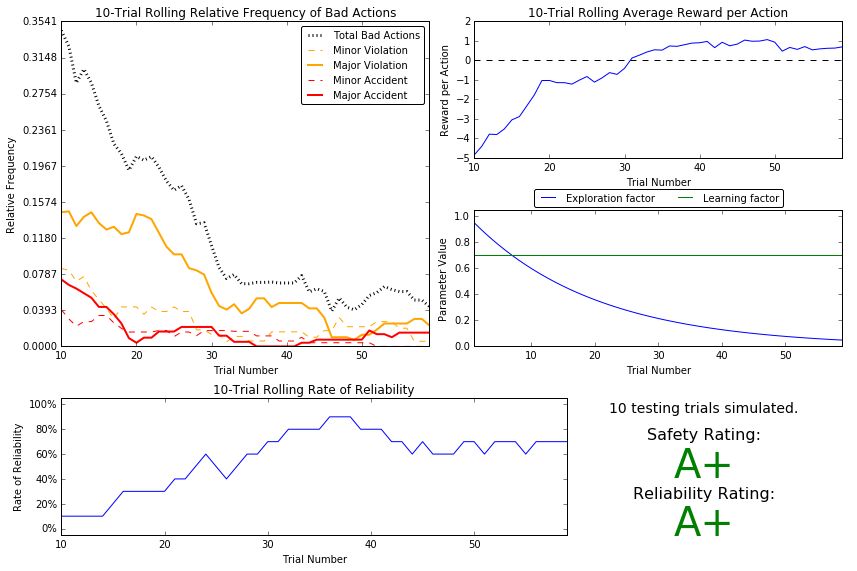

In [11]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

1) decaying function:
$$ \epsilon = a^t \textrm{with } a = 0.95  $$

2) 59 

3) tolerance: 0.05, alpha: 0.7. I used slightly higher than default tolerance because the cab starts being consistently reliable and safe after 55 or so trials and I used a slow decaying function for epsilon. Alternatively, I could have decayed my epsilon faster (say, e.g. a = 0.90) and used a lower tolerance but that would have still necessitated more trials (though the trials would be more successful).

Since we are not learning from future rewards, a high alpha parameters helps the cab learn the exact immediate consequence of an action faster. A lower alpha would, e.g., prevent it from correctly distinguishing between minor and major violations quickly.

4) We see very strong improvements in both reliability and safety. The improved agent always reached the destination and never made a bad decision in testing. 

5) Yes. This is not to say that the agent has no unexplored actions for any state, however, given a state the agent has likely learned at least 1 good action (even if sub-optimal) or learned to avoid all the bad actions.

6) Yes.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

Consider the state ('left', 'green', 'forward', 'left') {to be read from left to right as following: the cab is directed to go 'left', it faces a 'green' light, the oncoming traffic is going 'forward' and the traffic on the left is turning 'left'}.

In this case, legally, the cab can't turn left or stop at green light. It faces two other options, turning right or going forward. The optimal policy would be to go forward since that may or may not be closer to destination while turning right is definitely further away from the destination.

Consider another state ('right', 'red', 'right', 'left'). In this case, the optimal policy would be to go 'right' since that is both a legal and a desired move. 

Currently, not all states have the optimal policy. Consider, e.g. the previous example: ('right', 'red', 'right', 'left').

The learned reward for the actions are: forward : -6.48; None : 0.73; right : 0.00; left : 0.00

i.e. the agent correctly learned to not go forward but would choose to stop at the red light instead which is legally right but not the most efficient action. 



Consider another state ('left', 'green', None, 'forward') with the following rewards: forward : 0.52; None : -4.95; right : 0.22; left : 1.49.

In this case, all state-action rewards are recorded. The optimal learned policy in this case is 'left' which is also "real-world" optimal policy: the cab was directed to turn left, it faces a green light and no oncoming traffic so it is legal to turn left.




-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

We could have constructed this problem as follows: the cab only gets a reward on successfully reaching destination in time and nowhere else. In this setup, we'd be asking the cab/agent to figure out the optimal path (i.e. take more than 1 step) and one way to do so would be to make locations closer to the destination more attractive. In such a problem set up, we would need future rewards to train the agent since the intermediate locations don't have intrinsic rewards.

However, we have not set up the problem in that way. We don't ask the agent to figure out the optimal path. At each state, we tell the agent what the optimal next step would be. The agent is incentivized to take that step but only if it is legal to do so. Our agent is completely divorced from any consequences past the immediate consequence. 

There is another characteristic of our setup: Our states are independent of locations in the grid (even destination). No state, as defined in the agent, is closer or further away from the destination. There is no concept of distance of the agent's state (a combination of sensory inputs and next waypoint) to the destination (a location in the grid). Due to this, there is no concept of propagation of reward from final goal to intermediate stages (which necessitates future learning).


But how could it negatively affect Q-values?

Consider a "current state" when the cab is asked to turn right but the light is red. One of the actions available is to wait for light to turn green. Once the light turns green, the rewards of the state (ceteris paribus) increase since there is lower chance of a bad mistake such as running red light.

If we allow the agent to learn from this future state, we may be incorrectly incentivizing the agent to wait when the option to turn right may be available even in the current state. This problem could possibly be avoided by making changes to our rewards scheme but that would make the problem even harder.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.